Proton normalization constant K_p = 3.01e+60 eV^(alpha-1)
Neutrino normalization constant K_nu = 3.01e+59 eV^(alpha-1)
Expected number of neutrinos detected above 1.0 PeV: 246655867.26


/tmp/ipykernel_6241/923246763.py:37: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  N_nu_tot = integrate.quad(lambda E: K_nu * E**(-alpha), E_nu_min, E_nu_max)[0]


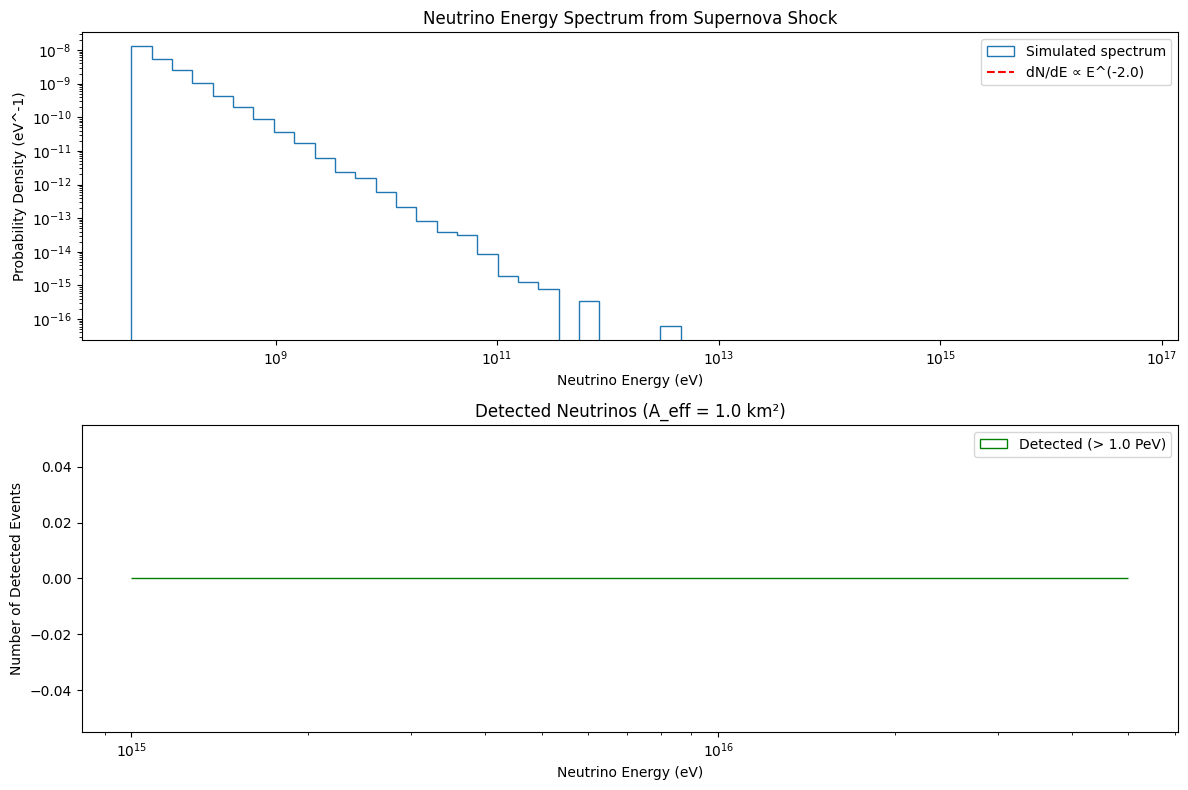

Neutrino fluence at 1.0 PeV: 2.52e-17 cm^-2 eV^-1
Total fluence above 1.0 PeV: 2.47e-02 cm^-2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Constants (in cgs units where applicable)
c = 3e10          # Speed of light (cm/s)
erg_to_eV = 6.242e11  # Conversion factor from erg to eV
kpc_to_cm = 3.086e21  # Conversion from kpc to cm

# Supernova parameters
d = 10 * kpc_to_cm  # Distance to supernova: 10 kpc
E_tot_CR = 1e50     # Total energy in cosmic rays (erg)
f_nu = 0.1          # Fraction of CR energy going into neutrinos
E_p_min = 1e9       # Minimum proton energy (eV)
E_p_max = 1e18      # Maximum proton energy (eV)
alpha = 2.0         # Power-law index

# Neutrino parameters
epsilon = 0.05      # Fraction of proton energy per neutrino
E_nu_min = epsilon * E_p_min  # Minimum neutrino energy
E_nu_max = epsilon * E_p_max  # Maximum neutrino energy

# Detector parameters
A_eff = 1e10        # Effective area (cm^2), ~1 km^2
E_threshold = 1e15  # Detection threshold: 1 PeV

# Step 1: Proton spectrum normalization
K_p = E_tot_CR * erg_to_eV / integrate.quad(lambda E: E ** (1 - alpha), E_p_min, E_p_max)[0]
print(f"Proton normalization constant K_p = {K_p:.2e} eV^(alpha-1)")

# Step 2: Neutrino spectrum normalization
E_tot_nu = f_nu * E_tot_CR * erg_to_eV
K_nu = E_tot_nu / integrate.quad(lambda E: E ** (1 - alpha), E_nu_min, E_nu_max)[0]
print(f"Neutrino normalization constant K_nu = {K_nu:.2e} eV^(alpha-1)")

# Precompute normalization for plotting (total number of neutrinos)
N_nu_tot = integrate.quad(lambda E: K_nu * E**(-alpha), E_nu_min, E_nu_max)[0]

# Step 3: Neutrino fluence at Earth (cm^-2 eV^-1)
def phi_nu(E_nu):
    return (K_nu / (4 * np.pi * d**2)) * E_nu**(-alpha)

# Integrated fluence above E_0 (cm^-2)
def phi_nu_above(E_0):
    if E_0 >= E_nu_max:
        return 0
    return (K_nu / (4 * np.pi * d**2)) * integrate.quad(lambda E: E**(-alpha), E_0, E_nu_max)[0]

# Step 4: Generate neutrino energies
N_sim = 10000
u = np.random.uniform(0, 1, N_sim)
E_nu_sim = (E_nu_min**(1 - alpha) - u * (E_nu_min**(1 - alpha) - E_nu_max**(1 - alpha)))**(1 / (1 - alpha))

# Step 5: Simulate detection
detected = E_nu_sim > E_threshold
E_nu_detected = E_nu_sim[detected]
N_detected_total = phi_nu_above(E_threshold) * A_eff
print(f"Expected number of neutrinos detected above {E_threshold/1e15} PeV: {N_detected_total:.2f}")

# Step 6: Visualization
plt.figure(figsize=(12, 8))

# Plot simulated neutrino spectrum
plt.subplot(2, 1, 1)
bins = np.logspace(np.log10(E_nu_min), np.log10(E_nu_max), 50)
plt.hist(E_nu_sim, bins=bins, density=True, histtype='step', label='Simulated spectrum')
E_nu_range = np.logspace(np.log10(E_nu_min), np.log10(E_nu_max), 100)
plt.plot(E_nu_range, (K_nu * E_nu_range**(-alpha)) / N_nu_tot, 
         'r--', label=f'dN/dE ∝ E^(-{alpha})')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutrino Energy (eV)')
plt.ylabel('Probability Density (eV^-1)')
plt.title('Neutrino Energy Spectrum from Supernova Shock')
plt.legend()

# Plot detected neutrinos
plt.subplot(2, 1, 2)
plt.hist(E_nu_detected, bins=np.logspace(np.log10(E_threshold), np.log10(E_nu_max), 30), 
         histtype='step', color='green', label=f'Detected (> {E_threshold/1e15} PeV)')
plt.xscale('log')
plt.xlabel('Neutrino Energy (eV)')
plt.ylabel('Number of Detected Events')
plt.title(f'Detected Neutrinos (A_eff = {A_eff/1e10} km²)')
plt.legend()

plt.tight_layout()
plt.show()  # Display the plot in Jupyter

# Output sample fluence
E_sample = 1e15
print(f"Neutrino fluence at {E_sample/1e15} PeV: {phi_nu(E_sample):.2e} cm^-2 eV^-1")
print(f"Total fluence above {E_sample/1e15} PeV: {phi_nu_above(E_sample):.2e} cm^-2")

Proton normalization constant K_p = 3.01e+60 eV^(alpha-1)
Neutrino normalization constant K_nu = 3.01e+59 eV^(alpha-1)
Expected number of neutrinos detected above 0.001 PeV: 13411595494.51
Simulated detected events: 520 out of 10000000


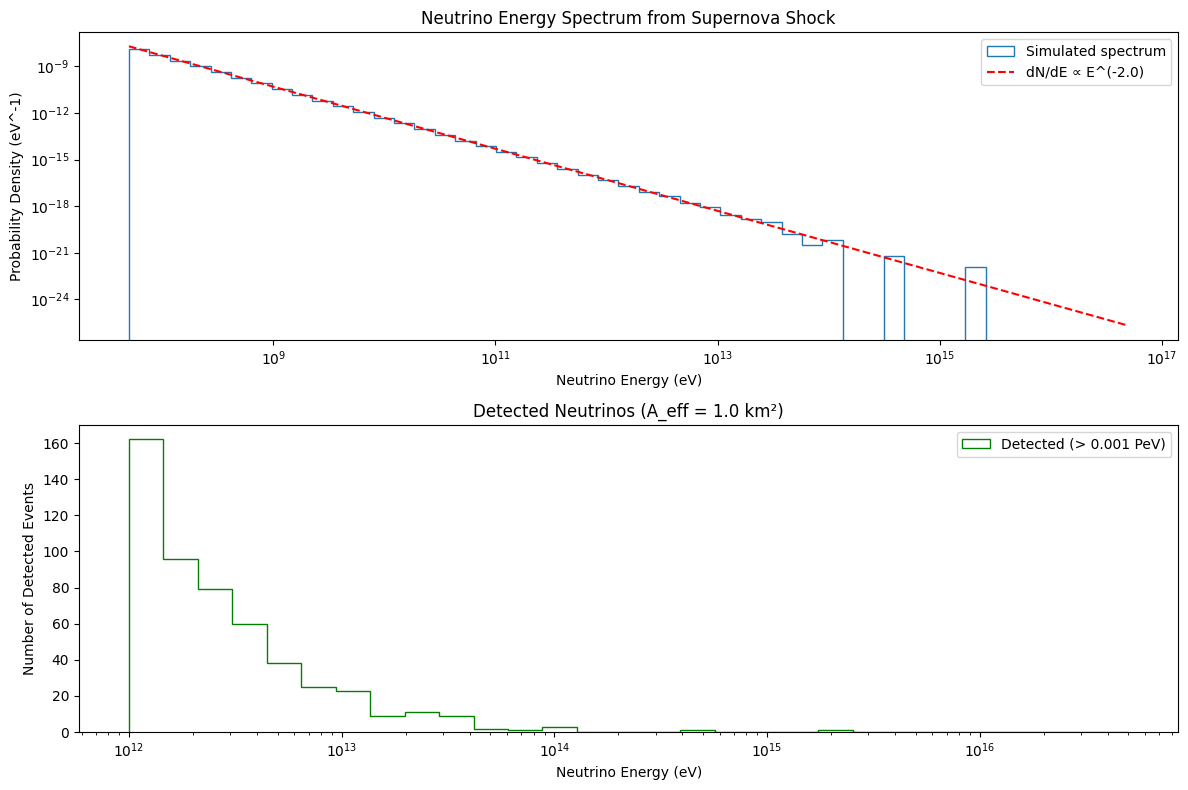

Neutrino fluence at 1.0 PeV: 2.52e-17 cm^-2 eV^-1
Total fluence above 1.0 PeV: 2.47e-02 cm^-2


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Constants (in cgs units where applicable)
c = 3e10          # Speed of light (cm/s)
erg_to_eV = 6.242e11  # Conversion factor from erg to eV
kpc_to_cm = 3.086e21  # Conversion from kpc to cm

# Supernova parameters
d = 10 * kpc_to_cm  # Distance to supernova: 10 kpc
E_tot_CR = 1e50     # Total energy in cosmic rays (erg)
f_nu = 0.1          # Fraction of CR energy going into neutrinos
E_p_min = 1e9       # Minimum proton energy (eV)
E_p_max = 1e18      # Maximum proton energy (eV)
alpha = 2.0         # Power-law index

# Neutrino parameters
epsilon = 0.05      # Fraction of proton energy per neutrino
E_nu_min = epsilon * E_p_min  # Minimum neutrino energy
E_nu_max = epsilon * E_p_max  # Maximum neutrino energy

# Detector parameters
A_eff = 1e10        # Effective area (cm^2), ~1 km^2
E_threshold = 1e12  # Detection threshold: 1 PeV ----CHANGED TO 1TeV----

# Step 1: Proton spectrum normalization
K_p = E_tot_CR * erg_to_eV / integrate.quad(lambda E: E ** (1 - alpha), E_p_min, E_p_max)[0]
print(f"Proton normalization constant K_p = {K_p:.2e} eV^(alpha-1)")

# Step 2: Neutrino spectrum normalization
E_tot_nu = f_nu * E_tot_CR * erg_to_eV
K_nu = E_tot_nu / integrate.quad(lambda E: E ** (1 - alpha), E_nu_min, E_nu_max)[0]
print(f"Neutrino normalization constant K_nu = {K_nu:.2e} eV^(alpha-1)")

# Precompute normalization for plotting (total number of neutrinos)
# After calculating K_nu
if alpha == 2:
    N_nu_tot = K_nu * (1 / E_nu_min - 1 / E_nu_max)
else:
    N_nu_tot = integrate.quad(lambda E: K_nu * E**(-alpha), E_nu_min, E_nu_max)[0]

# Step 3: Neutrino fluence at Earth (cm^-2 eV^-1)
def phi_nu(E_nu):
    return (K_nu / (4 * np.pi * d**2)) * E_nu**(-alpha)

# Integrated fluence above E_0 (cm^-2)
def phi_nu_above(E_0):
    if E_0 >= E_nu_max:
        return 0
    return (K_nu / (4 * np.pi * d**2)) * integrate.quad(lambda E: E**(-alpha), E_0, E_nu_max)[0]

# Step 4: Generate neutrino energies
N_sim = int(1e7)
# u = np.random.uniform(0, 1, N_sim)
# E_nu_sim = (E_nu_min**(1 - alpha) - u * (E_nu_min**(1 - alpha) - E_nu_max**(1 - alpha)))**(1 / (1 - alpha))

# # Generate energies (for alpha = 2)
# u = np.random.uniform(0, 1, N_sim)
# E_nu_sim = 1 / ( (1 / E_nu_min) - u * ( (1 / E_nu_min) - (1 / E_nu_max) ) )

# Generate uniform random numbers between 0 and 1
u = np.random.uniform(0, 1, N_sim)

# Check if alpha is exactly 2
if alpha == 2:
    # Second method: specialized formula for alpha = 2
    E_nu_sim = 1 / ( (1 / E_nu_min) - u * ( (1 / E_nu_min) - (1 / E_nu_max) ) )
else:
    # First method: general formula for alpha != 1
    E_nu_sim = (E_nu_min**(1 - alpha) - u * (E_nu_min**(1 - alpha) - E_nu_max**(1 - alpha)))**(1 / (1 - alpha))


# Step 5: Simulate detection
detected = E_nu_sim > E_threshold
E_nu_detected = E_nu_sim[detected]
N_detected_total = phi_nu_above(E_threshold) * A_eff
print(f"Expected number of neutrinos detected above {E_threshold/1e15} PeV: {N_detected_total:.2f}")
print(f"Simulated detected events: {len(E_nu_detected)} out of {N_sim}")

# Step 6: Visualization
plt.figure(figsize=(12, 8))

# Plot simulated neutrino spectrum
plt.subplot(2, 1, 1)
bins = np.logspace(np.log10(E_nu_min), np.log10(E_nu_max), 50)
plt.hist(E_nu_sim, bins=bins, density=True, histtype='step', label='Simulated spectrum')
E_nu_range = np.logspace(np.log10(E_nu_min), np.log10(E_nu_max), 100)
plt.plot(E_nu_range, (K_nu * E_nu_range**(-alpha)) / N_nu_tot, 
         'r--', label=f'dN/dE ∝ E^(-{alpha})')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutrino Energy (eV)')
plt.ylabel('Probability Density (eV^-1)')
plt.title('Neutrino Energy Spectrum from Supernova Shock')
plt.legend()

# Plot detected neutrinos
plt.subplot(2, 1, 2)
plt.hist(E_nu_detected, bins=np.logspace(np.log10(E_threshold), np.log10(E_nu_max), 30), 
         histtype='step', color='green', label=f'Detected (> {E_threshold/1e15} PeV)')
plt.xscale('log')
plt.xlabel('Neutrino Energy (eV)')
plt.ylabel('Number of Detected Events')
plt.title(f'Detected Neutrinos (A_eff = {A_eff/1e10} km²)')
plt.legend()

plt.tight_layout()
plt.show()  # Display the plot in Jupyter

# Output sample fluence
E_sample = 1e15
print(f"Neutrino fluence at {E_sample/1e15} PeV: {phi_nu(E_sample):.2e} cm^-2 eV^-1")
print(f"Total fluence above {E_sample/1e15} PeV: {phi_nu_above(E_sample):.2e} cm^-2")